# Cyclistic Case Study Project
*by Daria Yuferova*


## Case Scenario Description

__Cyclistic__ is a bike-sharing company with nearly 6,000 bicycles that are geotracked and locked into a network of 692 stations across Chicago.  
The previous business strategy proposed pricing flexibility, allowing more new customers to use company services: customers who purchase single-ride or full-day passes are referred to as <u>casual riders</u>, and customers who purchase annual memberships are Cyclistic <u>members</u>. The new business direction is concentrating on converting casual riders into members rather than attracting new ones. To make this happen, the marketing strategy needs to be rebuilt accordingly based on historical data analysis made by the analytical team.  

Thus, the business task for this case study states as follows: __to inform a data-driven decision of the executive team on future marketing strategy, we need to determine how casual riders behaviour differs from members.__

The following report will cover the process of end-to-end data analysis, starting with extracting data from public datasets, cleaning and transforming data, analyzing it, ending with visualizing the results and making recommendations.

## STEP 1. Collecting Data

First of all, we need to import all the necessary packages:

In [1]:
import pandas as pd # to manipulate dataframes
from pandas.api.types import CategoricalDtype # to custom sort certain values
import matplotlib.pyplot as plt # to visualize the results
import seaborn as sns # to visualize them even better

Upload files with bike rides data over the last year (2022 in this case) from the [website](https://divvy-tripdata.s3.amazonaws.com/index.html):

In [2]:
trips1 = pd.read_csv('../data/202201-divvy-tripdata.csv')
trips2 = pd.read_csv('../data/202202-divvy-tripdata.csv')
trips3 = pd.read_csv('../data/202203-divvy-tripdata.csv')
trips4 = pd.read_csv('../data/202204-divvy-tripdata.csv')
trips5 = pd.read_csv('../data/202205-divvy-tripdata.csv')
trips6 = pd.read_csv('../data/202206-divvy-tripdata.csv')
trips7 = pd.read_csv('../data/202207-divvy-tripdata.csv')
trips8 = pd.read_csv('../data/202208-divvy-tripdata.csv')
trips9 = pd.read_csv('../data/202209-divvy-tripdata.csv')
trips10 = pd.read_csv('../data/202210-divvy-tripdata.csv')
trips11 = pd.read_csv('../data/202211-divvy-tripdata.csv')
trips12 = pd.read_csv('../data/202212-divvy-tripdata.csv')

Let's take a look at the first dataframe to see what information we get from the dataset:

In [3]:
trips1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


We have the data on the company's bike rides throughout 2022 with specified types of bikes, timestamps, customer types. The latter is exactly what we're interested in for this analysis.

To ensure data integrity, let's check if columns are the same across all files and placed in the same order:

In [4]:
print(list(trips1.columns) == list(trips2.columns) == list(trips3.columns) ==
      list(trips4.columns) == list(trips5.columns) == list(trips6.columns) ==
      list(trips7.columns) == list(trips8.columns) == list(trips9.columns) ==
      list(trips10.columns) == list(trips11.columns) == list(trips12.columns))

True


Check data types:

In [5]:
print(trips1.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


Now that we know that everything is in order, we are ready to concatenate all files into one (one under the other):

In [6]:
trips = pd.concat([trips1, trips2, trips3, trips4, trips5, trips6,
                   trips7, trips8, trips9, trips10, trips11, trips12], axis=0, ignore_index=True)

## STEP 2. Cleaning and Preparing Data for Analysis

Delete unnecessary columns, rename column containing customer types:

In [7]:
clean_trips = trips \
    .drop(columns=['start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']) \
    .rename(columns={'member_casual': 'customer_type'})

Let's make a small sanity check to see if the values are appropriate and consistent with what we're expecting:

In [8]:
print('Types of customers are:', clean_trips['customer_type'].unique(), sep='\n')

print('Types of bikes are:', clean_trips['rideable_type'].unique(), sep='\n')

print('Min and max of ride IDs are:', clean_trips['ride_id'].min(), 
      clean_trips['ride_id'].max(), sep='\n')

print('Min and max of starting date are:', clean_trips['started_at'].min(), 
      clean_trips['started_at'].max(), sep='\n')

print('Min and max of ending date are:', clean_trips['ended_at'].min(), 
      clean_trips['ended_at'].max(), sep='\n')

Types of customers are:
['casual' 'member']
Types of bikes are:
['electric_bike' 'classic_bike' 'docked_bike']
Min and max of ride IDs are:
00000123F60251E6
FFFFFCFA2D52CEB7
Min and max of starting date are:
2022-01-01 00:00:05
2022-12-31 23:59:26
Min and max of ending date are:
2022-01-01 00:01:48
2023-01-02 04:56:45


Everything looks fine!

Next interesting substep is <u>DateTime Manipulation</u> – a process of reformatting the columns containing time of start and end of bike ride for our purposes. We plan to analyze the behaviour of different customer types by time of the day, day of the week, and month, as we suspect that these angles might provide differences.  
So, let's extract this information from our dataset:

In [9]:
# Change the type of date columns to datetime:

clean_trips['started_at'] = pd.to_datetime(clean_trips['started_at'])
clean_trips['ended_at'] = pd.to_datetime(clean_trips['ended_at'])

# Extract time, day of the week, and month of ride:

clean_trips['time_of_start'] = clean_trips['started_at'].dt.strftime('%H')
clean_trips['day_of_week_start'] = clean_trips['started_at'].dt.strftime('%a')
clean_trips['month_of_start'] = clean_trips['started_at'].dt.strftime('%b')

# Sort days of the week and months in the order that we need:

cat_day_of_week = CategoricalDtype(['Mon', 'Tue', 'Wed',
                                    'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
cat_month = CategoricalDtype(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

clean_trips['day_of_week_start'] = clean_trips['day_of_week_start'].astype(cat_day_of_week)
clean_trips['month_of_start'] = clean_trips['month_of_start'].astype(cat_month)

Create a new column `ride_length`, representing the duration of rides in minutes, and set it to integer:

In [10]:
clean_trips['ride_length'] = ((clean_trips['ended_at'] - clean_trips['started_at'])
                              .dt.total_seconds() / 60).astype(int)

Now check the quality of data in the new column by examining minimum and maximum value:

In [11]:
print('Min and max of ride length are:', clean_trips['ride_length'].min(), 
      clean_trips['ride_length'].max(), sep='\n')

Min and max of ride length are:
-10353
41387


Let's remove the rows where ride length is a negative value:

In [12]:
clean_trips = clean_trips.drop(clean_trips[clean_trips.ride_length < 0].index)

# Double-check:

print('New min of ride length is:', clean_trips['ride_length'].min(), sep='\n')

New min of ride length is:
0


## STEP 3. Data Exploration

Let's also look closer at the maximum value of the `ride_length` column:

In [13]:
print(clean_trips.loc[clean_trips['ride_length'].idxmax()])

ride_id                            7D4CB0DD5137CA9A
rideable_type                           docked_bike
started_at                      2022-10-01 15:04:38
ended_at                        2022-10-30 08:51:53
start_station_name    St. Louis Ave & Fullerton Ave
end_station_name                                NaN
customer_type                                casual
time_of_start                                    15
day_of_week_start                               Sat
month_of_start                                  Oct
ride_length                                   41387
Name: 4994493, dtype: object


Notice that maximum ride length is almost 20 days, not hours - which is strange.  
After investigating further, a rideable type `docked_bike` is found to be associated with the longest rides:

In [14]:
print(clean_trips.sort_values('ride_length', ascending=False) \
      .head(20)[['rideable_type','ride_length']])

        rideable_type  ride_length
4994493   docked_bike        41387
1464697   docked_bike        36257
2119596   docked_bike        35820
286843    docked_bike        34354
2905359   docked_bike        34208
2905537   docked_bike        34208
2905815   docked_bike        34189
1569397   docked_bike        32402
2996193   docked_bike        32035
5029611   docked_bike        31269
2092874   docked_bike        31110
5029950   docked_bike        31093
2916621   docked_bike        31085
2136010   docked_bike        31023
5000574   docked_bike        30306
5029256   docked_bike        30292
1725366   docked_bike        30010
4995227   docked_bike        29919
2135835   docked_bike        29904
1729279   docked_bike        29648


Before drawing any conclusions, let's see how ride duration is distributed among all bike types, as maybe we have other outliers.
Theoretically, we expect to see an exponentially decreasing `ride_length` graph, within about one-day scope:

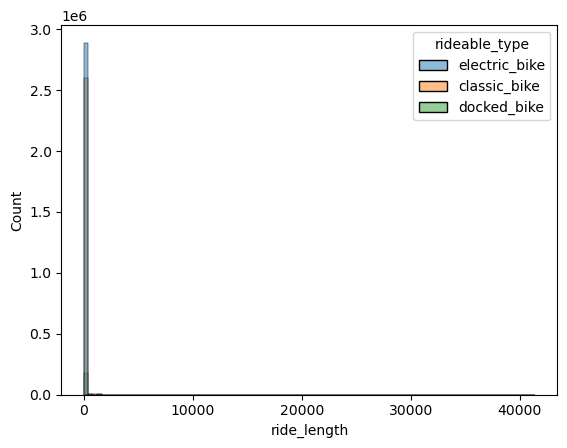

In [15]:
sns.histplot(data=clean_trips, x='ride_length', hue='rideable_type',bins=100)
plt.show()

Unfortunately, due to the high number of rides concentrated close to zero, we can't really see any distribution.
However, the limit of x-axis (~40000 minutes) tells us that there are indeed some longer trips.  
Let's change the plot type to see it clearer:

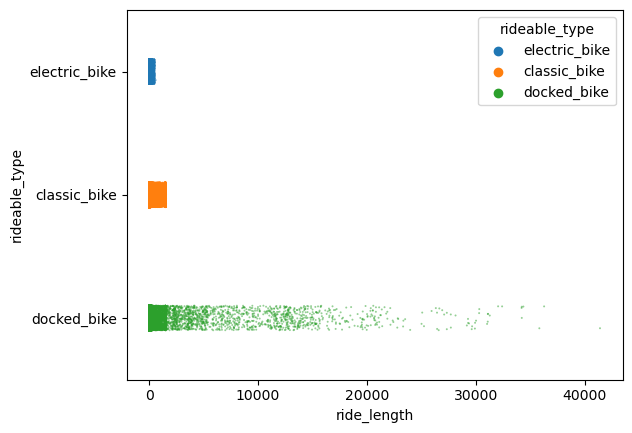

In [16]:
sns.stripplot(data=clean_trips, y='rideable_type', x='ride_length',
              hue='rideable_type', alpha=0.5, sizes=[2])
plt.show()

We can see that docked bike rides take up to almost one month, which differentiates significantly from what we see with other bike types. We might suggest that the `docked_bike` type accounts for the bikes taken for quality checks or repairs by the company. This could be the reason for longer registered rides.  
Let's plot ride length distribution without docked bikes:

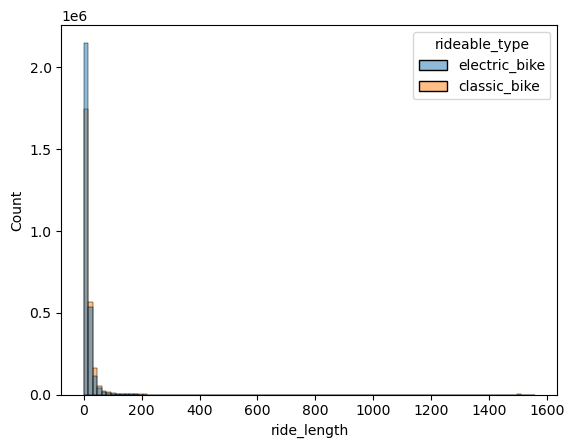

In [17]:
without_docked = clean_trips[clean_trips.rideable_type != 'docked_bike']
sns.histplot(data=without_docked,
             x='ride_length', hue='rideable_type',bins=100)
plt.show()

Now, this looks like a more natural distribution (exponential decay and the maximum around 1 day time).  
Let's double-check if ride duration statistics for docked bikes differs significantly

In [18]:
# from all other types:

docked_stats = clean_trips \
    .groupby(~clean_trips['rideable_type'].str.contains('docked_bike')) \
    .ride_length.agg(['count', 'min', 'mean', 'max'])
docked_stats.index = ['docked_bike', 'non_docked_bike']

# across all types:

diff_bikes_stats = clean_trips \
    .groupby('rideable_type') \
    .ride_length.agg(['count', 'min', 'mean', 'max'])

# and from all dataset:

all_bikes_stats = pd.DataFrame({
    'count': clean_trips['ride_length'].count(),
    'min': clean_trips['ride_length'].min(),
    'mean': clean_trips['ride_length'].mean(),
    'max': clean_trips['ride_length'].max()}, index=['all_bike_types'])

print('Ride length statistics for different types of bikes:',
      docked_stats, diff_bikes_stats, all_bikes_stats, sep='\n')

Ride length statistics for different types of bikes:
                   count  min        mean    max
docked_bike       177474    0  122.223024  41387
non_docked_bike  5490169    0   15.618507   1559
                 count  min        mean    max
rideable_type                                 
classic_bike   2601190    0   18.506961   1559
docked_bike     177474    0  122.223024  41387
electric_bike  2888979    0   13.017790    614
                  count  min       mean    max
all_bike_types  5667643    0  18.956673  41387


Despite having a small number of rides (~3% of all rides), docked bike rides do skew average and maximum statistics of ride duration for the whole dataset.  
We suggest some technical nature of rides registered under the `docked_bike` type.  
In the real-world scenario, we would have known more business specifics, but for now we have to rely on our suggestion.  
Let's therefore remove those instances from our analysis, as they're telling us nothing about customer behaviour, and might lead to inaccurate business conclusions.

Create another version of `clean_trips` dataframe without `docked_bike`:

In [19]:
clean_trips_v2 = without_docked

## STEP 4. Descriptive Analysis and Visualizations

Now moving directly to the analysis that will help us answer the question of __how casual riders and members differ in using bike renting services.__  
Let's first get the main statistics of rides for the two groups:

In [20]:
rides_stats = clean_trips_v2.groupby('customer_type')\
    .ride_length.agg(['count', 'min', 'max', 'median', 'mean'])
print('Rides statistics:', rides_stats, sep='\n')

Rides statistics:
                 count  min   max  median       mean
customer_type                                       
casual         2144517    0  1559    12.0  20.912836
member         3345652    0  1559     8.0  12.224915


Overall, we can see that riders with memberships make 1.5 times more rides per year than casual riders,
but their rides are significantly shorter. The maximum duration is exactly the same for both groups (~26 hours),
which could indicate a rental time limit set by the company.

Let's also check if different groups have strong preferences regarding types of bikes, electric or classic:

In [21]:
print(clean_trips_v2.groupby(['customer_type', 'rideable_type']).rideable_type.agg('count'))

customer_type  rideable_type
casual         classic_bike      891446
               electric_bike    1253071
member         classic_bike     1709744
               electric_bike    1635908
Name: rideable_type, dtype: int64


We can conclude that around 60% of casual riders prefer electric bikes while members equally use both bike types.  

As part of our business task, we dive into the specifics of customer behaviour by looking at the number and average duration of rides from different angles.  
Let's also visualize the findings. First, set a color pallete and style for all visualizations:

In [22]:
sns.set_palette(sns.color_palette('Set2'))
sns.set_style('whitegrid')

In [23]:
# Let's look at ride duration by hour:

time_df = pd.concat([clean_trips_v2[clean_trips_v2.customer_type=='casual'].groupby(['time_of_start'])\
    .ride_length.agg(['count', 'mean']),
                   clean_trips_v2[clean_trips_v2.customer_type=='member'].groupby(['time_of_start'])\
    .ride_length.agg(['count', 'mean'])], 
                    axis=1).reset_index() # we use concatenation here for better visual comparison of dataframes, 
                                          # but then we will change it to the long format for data plotting

print('Rides by hour             casual    |    member:', time_df, sep='\n')

Rides by hour             casual    |    member:
   time_of_start   count       mean   count       mean
0             00   43813  20.334878   36072  12.496341
1             01   28228  21.651870   22164  12.882738
2             02   17524  22.549589   12894  12.189933
3             03   10439  22.585018    8055  12.688392
4             04    7224  21.625554    8942  12.853277
5             05   11881  15.674859   32282  10.076482
6             06   28458  14.731710   91243  10.569479
7             07   49612  13.934996  172501  11.187599
8             08   66755  15.390278  204535  10.975281
9             09   66862  19.682675  144007  11.099988
10            10   84285  22.928125  135813  12.035453
11            11  109692  23.139199  162417  12.375084
12            12  130472  23.253556  187496  11.987248
13            13  135693  23.448291  186077  12.043036
14            14  144124  23.092413  185008  12.480579
15            15  161913  22.638930  221566  12.514334
16            16

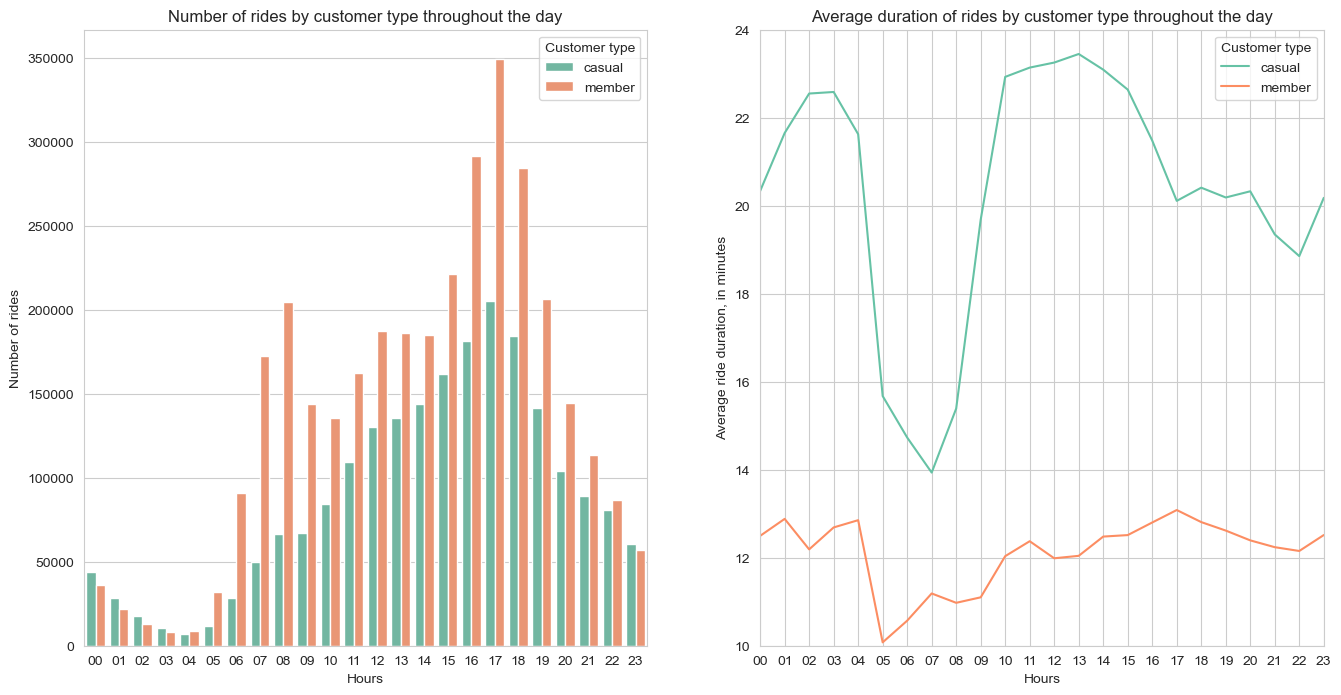

In [24]:
# Remember to go back to the long format!

time_df = clean_trips_v2.groupby(['customer_type', 'time_of_start'])\
    .ride_length.agg(['count', 'mean'])\
    .reset_index()

fig1, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(data=time_df, x='time_of_start', y='count', hue='customer_type', ax=ax[0]) \
    .set(title='Number of rides by customer type throughout the day',
         xlabel='Hours',
         ylabel='Number of rides')

sns.lineplot(data=time_df, x='time_of_start', y='mean', hue='customer_type', ax=ax[1]) \
    .set(title='Average duration of rides by customer type throughout the day',
         xlabel='Hours',
         ylabel='Average ride duration, in minutes',
         xlim=(0, 23),
         ylim=(10, 24))

# Rename legends:

ax[0].legend(title='Customer type')
ax[1].legend(title='Customer type')

plt.show()

We can see that there is a clear trend for casual riders to make more rides during daytime, while members' number of rides peaks around rush hours, at 8 and 17 h, which leads us to a conclusion: customers with membership tend to use bikes to get to/from work.  
The average duration of rides fluctuates more for casual users than for members, which makes sense since they happen more spontaneously.

In [25]:
# Let's look at ride duration by day of the week:

days_df = clean_trips_v2.groupby(['customer_type', 'day_of_week_start']) \
    .ride_length.agg(['count', 'mean'])\
    .reset_index()

print('Rides by day of the week:', days_df, sep='\n')

Rides by day of the week:
   customer_type day_of_week_start   count       mean
0         casual               Mon  255140  20.925135
1         casual               Tue  245978  18.942897
2         casual               Wed  257019  18.283131
3         casual               Thu  289554  18.842523
4         casual               Fri  311313  19.988018
5         casual               Sat  432229  23.267761
6         casual               Sun  353284  23.819324
7         member               Mon  473338  11.781173
8         member               Tue  518618  11.640298
9         member               Wed  523868  11.615611
10        member               Thu  532257  11.803007
11        member               Fri  467085  12.041937
12        member               Sat  443277  13.651293
13        member               Sun  387209  13.542493


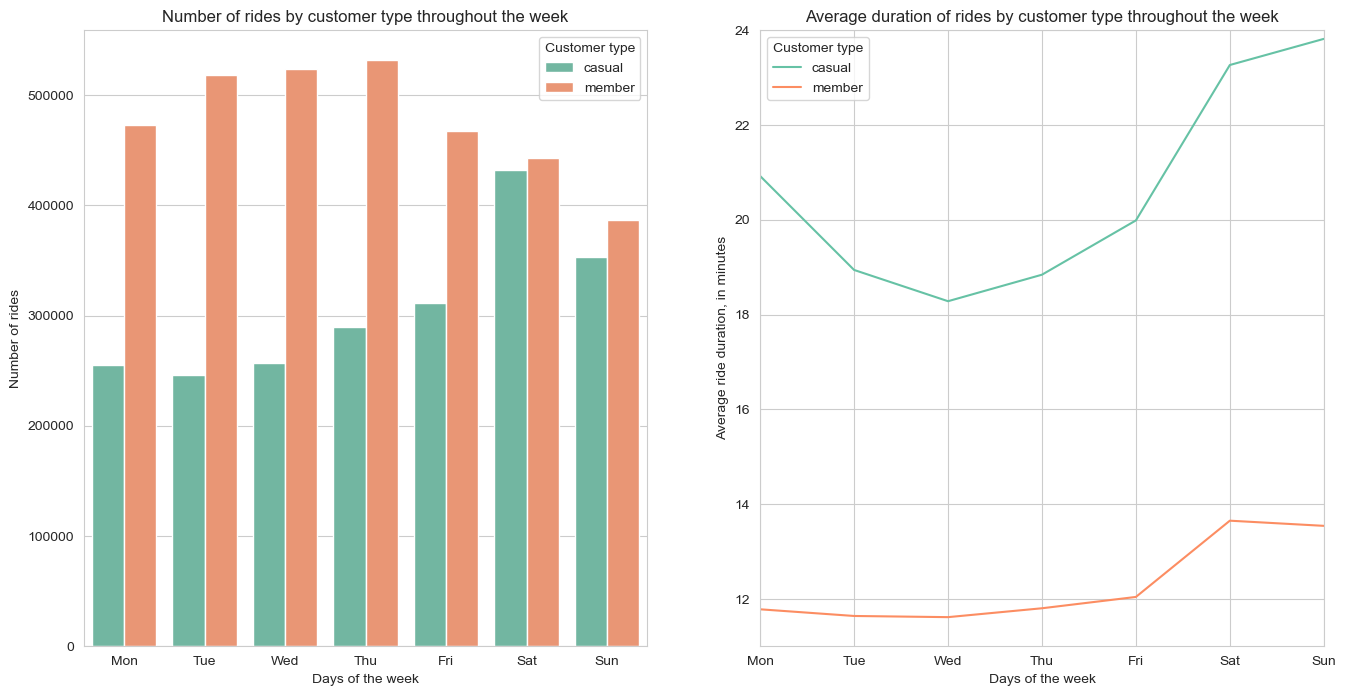

In [26]:
fig2, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(data=days_df, x='day_of_week_start', y='count', hue='customer_type', ax=ax[0]) \
    .set(title='Number of rides by customer type throughout the week',
         xlabel='Days of the week',
         ylabel='Number of rides')

sns.lineplot(data=days_df, x='day_of_week_start', y='mean', hue='customer_type', ax=ax[1]) \
    .set(title='Average duration of rides by customer type throughout the week',
         xlabel='Days of the week',
         ylabel='Average ride duration, in minutes',
         xlim=('Mon','Sun'),
         ylim=(11,24))

# Rename legends:

ax[0].legend(title='Customer type')
ax[1].legend(title='Customer type')

plt.show()

We can see that both groups on average tend to make longer rides on weekends, with the shortest rides happening on Wednesdays.
Members are more active on weekdays, probably in order to get to work (as noted before). However, casual riders make more rides on weekends and on average have longer trips, therefore we might suggest that casual riders mostly use bikes for leisure. 

In [27]:
# Let's look at ride duration by month:

months_df = pd.concat([clean_trips_v2[clean_trips_v2.customer_type=='casual'].groupby(['month_of_start'])\
    .ride_length.agg(['count', 'mean']),
                   clean_trips_v2[clean_trips_v2.customer_type=='member'].groupby(['month_of_start'])\
    .ride_length.agg(['count', 'mean'])], 
                    axis=1).reset_index() # we again use concatenation for better visual comparison of dataframes, 
                                          # but then we will change it to the long format for data plotting

print('Rides by month             casual    |    member:', months_df, sep='\n')

Rides by month             casual    |    member:
   month_of_start   count       mean   count       mean
0             Jan   17559  19.342445   85250  11.490569
1             Feb   20055  20.269908   94193  10.918402
2             Mar   81523  23.333599  194160  11.468397
3             Apr  114301  22.303348  244832  11.003819
4             May  254006  24.425246  354443  12.878057
5             Jun  338405  22.928615  400148  13.509884
6             Jul  374993  21.894515  417427  13.229568
7             Aug  332598  20.229000  427004  12.895373
8             Sep  276870  19.206126  404640  12.486830
9             Oct  196375  17.439827  349695  11.469257
10            Nov   94863  15.004828  236948  10.642787
11            Dec   42969  13.562894  136912  10.131092


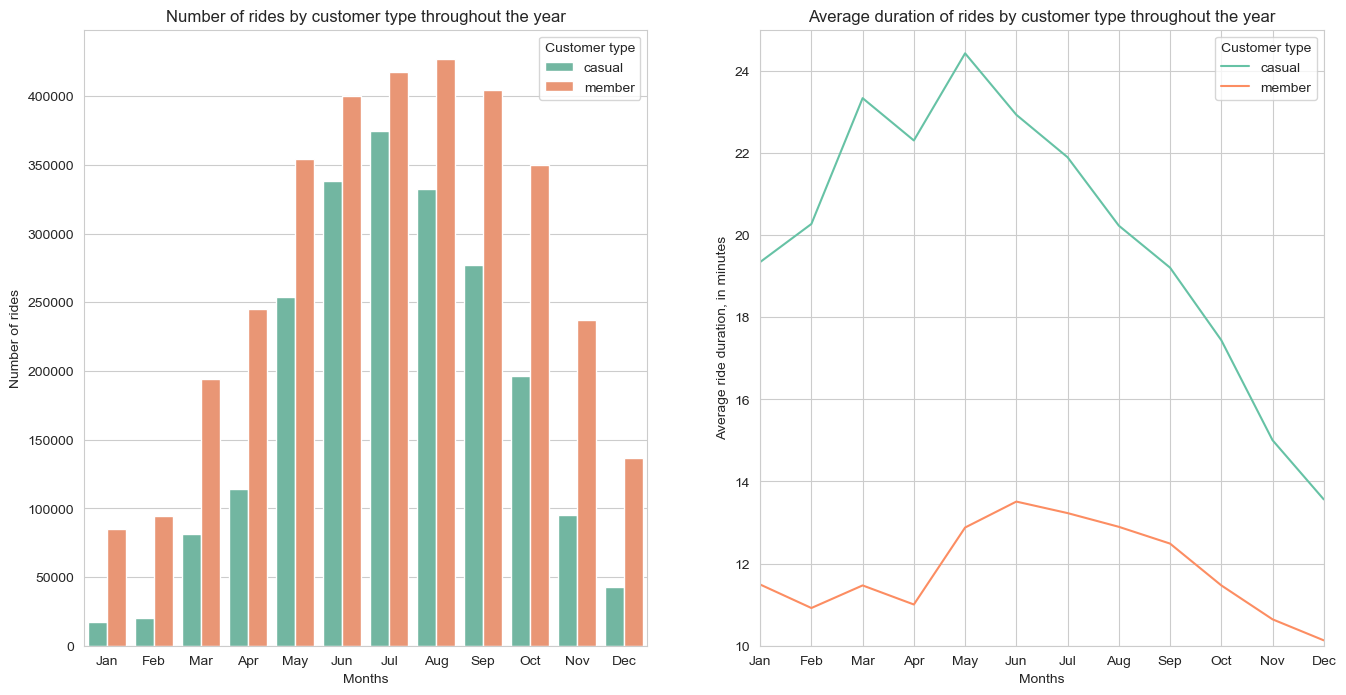

In [28]:
# Remember to go back to the long format!

months_df = clean_trips_v2.groupby(['customer_type', 'month_of_start'])\
    .ride_length.agg(['count', 'mean'])\
    .reset_index()

fig3, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(data=months_df, x='month_of_start', y='count', hue='customer_type', ax=ax[0]) \
    .set(title='Number of rides by customer type throughout the year',
         xlabel='Months',
         ylabel='Number of rides')

sns.lineplot(data=months_df, x='month_of_start', y='mean', hue='customer_type', ax=ax[1]) \
    .set(title='Average duration of rides by customer type throughout the year',
         xlabel='Months',
         ylabel='Average ride duration, in minutes',
         xlim=('Jan','Dec'),
         ylim=(10,25))

# Rename legends:

ax[0].legend(title='Customer type')
ax[1].legend(title='Customer type')

plt.show()

We can see that both groups act similar in terms of rides number by month, with the highest numbers in summertime.
Same applies to the average duration of rides, peaking in May and June for casual riders and members respectively.

## End of Scenario, Recommendations

With the help of visualizations, we can see the differences in casual riders/members behaviour clearer.  

Based on the historical data provided over the last year, we can say that casual riders use bikes for rent mostly during daytime, making longer and more frequent rides on weekends.  
Cyclistic members use bike renting services to get to work and back (Mon-Fri), spending on average less time riding than casual customers but accounting for 1.5 times more rides per year.  
Both groups use company's services more during warmer months, acting similarly throughout the year.

Based on these findings, analytical team can suggest the following recommendations for the executive team to improve the marketing strategy in order to convert casual riders into members more effectively:
- The company can offer discounts/better terms for longer bike rides (e.g. around the average ride duration for casual riders - 20 mins) or rides on weekends as part of the membership.
- The company can provide more electric bikes and promote them as part of the membership.
- The best time for an active marketing campaign would be right before/during summer, when casual riders are most active.
- In order to cut expenses, overall number of bikes and stations can be reduced during winter, as both groups make less rides during this time.
- For more detailed recommendations analysts need to get access to more data: demographic (such as age, sex), Apple or Android app, payment method, type of subscription, etc. - to better meet the needs of different groups of casual customers.
- Another angle to look at the data would be geographical: to see what neighborhoods are not covered by bike stations, to expand more to business areas and encourage casual riders to also use bikes for office commute, or to expand more to parks and other recreation areas and create better conditions for their leisure rides.

_The End. Now let's all rent a bike, it's always summertime somewhere! :)_